### Estimating dimension

My goal in this notebook is to 
1. Generate data with intrinsic dimension 1
1. implement a parallel version of k-means++ using glom

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


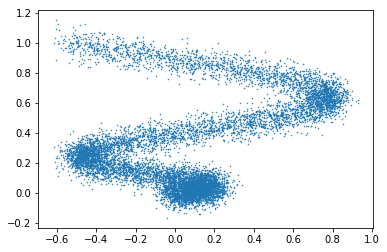

In [54]:
t=arange(0,1,0.0001)
s=random.permutation(arange(0,1,0.0001))

x=stack([sin(10*t)*t,cos(10*s)*s,t**2,s**3,sin(10*t)*t,cos(10*s)*s,t**2,s**3])
#x=zeros((4,len(t)))
order=random.permutation(len(t))
r=x[:,order]
r[:,:2]

r=r+random.normal(size=r.shape,scale=0.05)

plot(r[0,:],r[2,:],'.',markersize=1)

In [55]:
Centers=r[:,0:1]
p=r[:,1:2]
def D(p,Centers):
    # find the minimal square distance between a point p and a set of points: Centers
    diff=p-Centers
    dists=sum(diff**2,axis=0)
    return min(dists)
D(p,Centers)

0.10045533728417552

In [56]:
def KPP(r):
    Centers=r[:,0:1]
    Max=1000
    all_d=[]
    max_d=[]
    cent_no=[]
    d_vec=[]
    count_overflow=0

    print('centers\texamples\tProbability\td^2\t\trecent max d^2')
    for epoch in range(10):
        for i in range(1,len(t)):
            point=r[:,i:i+1]
            d=D(point,Centers)
            d_vec.append(d)
            all_d.append(sqrt(d))
            Pr=d/Max
            if Pr > 1:
                count_overflow+=1
            cent_no.append(Centers.shape[1])
            if i%5000 == 0:
                print('%d\t%d\t\t%7.6f\t%7.6f\t%7.6f'%(Centers.shape[1],i,Pr,d,max(d_vec)))
            if random.rand()<Pr:
                Centers=append(Centers,point,axis=1)
                max_d.append(max(d_vec))
                Max=max(d_vec)*10
                d_vec=[]
    print(count_overflow)
    return Centers,all_d,cent_no
Centers,all_d,cent_no = KPP(r)

centers	examples	Probability	d^2		recent max d^2
129	5000		0.012601	0.035878	0.141131
564	5000		0.037124	0.023637	0.030640
1012	5000		0.032769	0.023637	0.066440
1457	5000		0.061029	0.021324	0.021324
1823	5000		0.010567	0.005639	0.043181
2228	5000		0.032253	0.005639	0.006434
2603	5000		0.015437	0.005639	0.034941
2974	5000		0.012247	0.005639	0.034941
3325	5000		0.008310	0.005639	0.046047
3691	5000		0.016140	0.005639	0.028240
1


In [57]:
from statsmodels.nonparametric.smoothers_lowess import lowess

figure(figsize=[10,8])
filt_d = lowess(all_d,range(len(all_d)), is_sorted=True, frac=0.002, it=0)
#F=normpdf(arange(-2,2.1,0.2),0,1)
#plot(F)
#filt_d=convolve(all_d,F,mode='same')

Text(0,0.5,'distance')

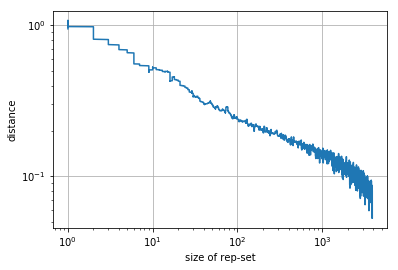

In [58]:
loglog(cent_no,filt_d[:,1])
grid()
xlabel('size of rep-set')
ylabel('distance')

Text(0,0.5,'distance')

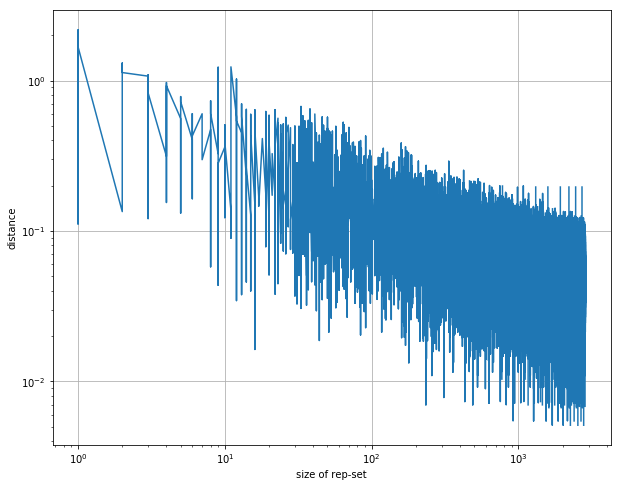

In [17]:
figure(figsize=[10,8])
loglog(cent_no,all_d)
grid()
xlabel('size of rep-set')
ylabel('distance')

In [28]:
F=normpdf(arange(-2,2.1,0.2),0,1)
#plot(F)
smooth=convolve(all_d,F,mode='same')


NameError: name 'd' is not defined

In [ ]:
F=normpdf